# PyIRI using Spherical Harmonics reconstruction

PyIRI can now reconstruct Electron Density Profile (EDP) parameters using a Spherical Harmonics (SH) and Fourier series expansion with the `sh_library` module. The SH parameters include:

- foF2 (URSI and CCIR coefficients)
- hmF2 (SHUBIN-2015 and AMTB-2013 models)
- B0
- B1
- M3000(F2) (CCIR only; used to compute hmF2 through the BSE-1979 model)
- foEs (exclusively in PyIRI)

The SH coefficients were derived from quasi-dipole magnetic local time (`MLT`) parameter grids, but they can be used with geographic (`GEO`) and quasi-dipole (`QD`) input grids as well. The choice of coordinates is determined by the variable `coord`.

## Necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

import PyIRI.sh_library as sh

## F2 layer parameters

To calculate monthly mean parameters for IG=0 and IG=100, use the `IRI_monthly_mean_par` function, or alternatively the `run_seas_iri_reg_grid` function to avoid having to preemptively create a latitude-longitude grid.

Similarly, to calculate EDP parameters for one day for a specific F10.7 input, use the `IRI_density_1day` function, or alternatively the `run_iri_reg_grid` function to avoid having to preemptively create a latitude-longitude grid.

In this tutorial, we will see how to generate monthly mean parameters.

In [2]:
# Set input parameters

year = 2014
month = 12
aUT = np.arange(0, 24)

coord = 'GEO'               # or 'QD' or 'MLT'
foF2_coeff = 'URSI'         # or 'CCIR'
hmF2_model = 'SHU2015'      # or 'AMTB2013' or 'BSE1979'
coeff_dir = None            # defaults to PyIRI.coeff_dir

# Run PyIRI on a regular geographic grid
(alon,
 alat,
 alon_2d,
 alat_2d,
 aalt,
 aUT,
 F2,
 F1,
 E,
 sun,
 mag,
 EDP) = sh.run_seas_iri_reg_grid(year,
                                 month,
                                 coeff_dir, 
                                 hr_res=1, 
                                 lat_res=3, 
                                 lon_res=3,
                                 alt_res=10,
                                 alt_min=100,
                                 alt_max=700,
                                 foF2_coeff=foF2_coeff,
                                 hmF2_model=hmF2_model,
                                 coord=coord)


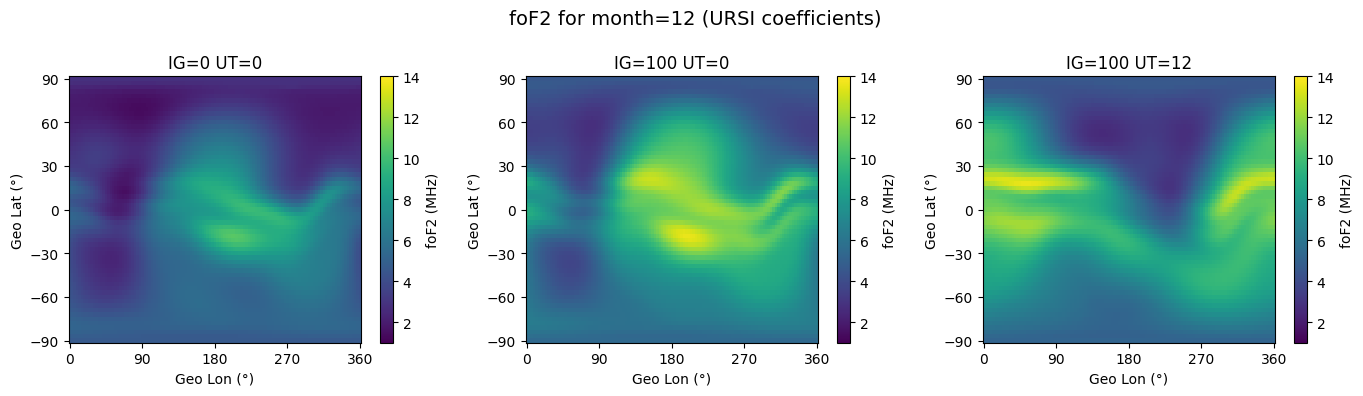

In [12]:
# Plot foF2
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.subplots_adjust(right=0.85)

im0 = ax[0].pcolormesh(alon_2d, alat_2d, F2['fo'][0, :, 0].reshape(alat_2d.shape), vmin=1, vmax=14)
ax[0].set_title('IG=0 UT=0')
fig.colorbar(im0, ax=ax[0], label='foF2 (MHz)')

im1 = ax[1].pcolormesh(alon_2d, alat_2d, F2['fo'][0, :, 1].reshape(alat_2d.shape), vmin=1, vmax=14)
ax[1].set_title('IG=100 UT=0')
fig.colorbar(im1, ax=ax[1], label='foF2 (MHz)')

im2 = ax[2].pcolormesh(alon_2d, alat_2d, F2['fo'][12, :, 1].reshape(alat_2d.shape), vmin=1, vmax=14)
ax[2].set_title('IG=100 UT=12')
fig.colorbar(im2, ax=ax[2], label='foF2 (MHz)')

for i in range(3):
    ax[i].set_xlabel('Geo Lon (°)')
    ax[i].set_ylabel('Geo Lat (°)')
    ax[i].set_yticks(np.arange(-90, 91, 30))
    ax[i].set_xticks(np.arange(0, 361, 90))

plt.suptitle(f'foF2 for month={month:02d} ({foF2_coeff} coefficients)', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.99, 0.99])

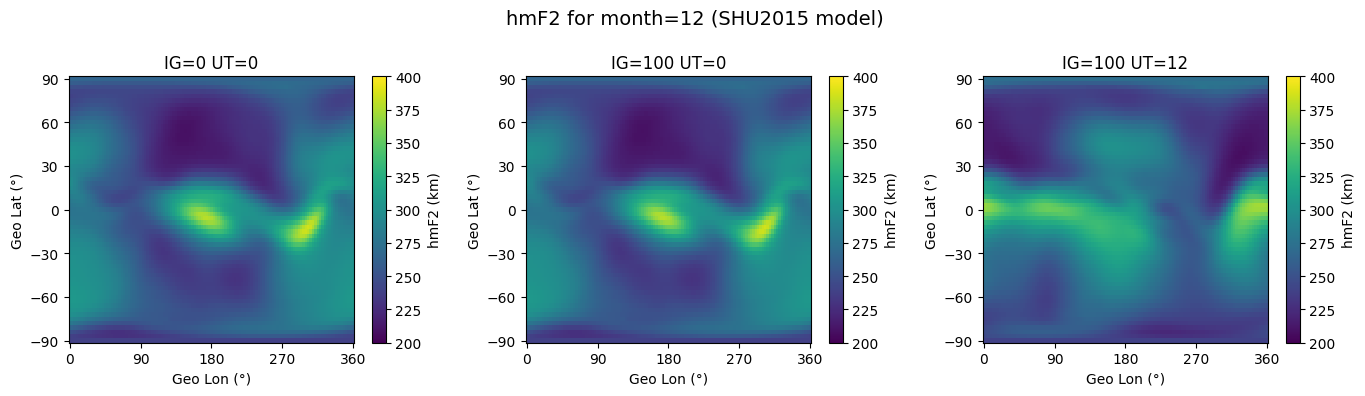

In [11]:
# Plot hmF2
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.subplots_adjust(right=0.85)

im0 = ax[0].pcolormesh(alon_2d, alat_2d, F2['hm'][0, :, 0].reshape(alat_2d.shape), vmin=200, vmax=400)
ax[0].set_title('IG=0 UT=0')
fig.colorbar(im0, ax=ax[0], label='hmF2 (km)')

im1 = ax[1].pcolormesh(alon_2d, alat_2d, F2['hm'][0, :, 1].reshape(alat_2d.shape), vmin=200, vmax=400)
ax[1].set_title('IG=100 UT=0')
fig.colorbar(im1, ax=ax[1], label='hmF2 (km)')

im2 = ax[2].pcolormesh(alon_2d, alat_2d, F2['hm'][12, :, 1].reshape(alat_2d.shape), vmin=200, vmax=400)
ax[2].set_title('IG=100 UT=12')
fig.colorbar(im2, ax=ax[2], label='hmF2 (km)')

for i in range(3):
    ax[i].set_xlabel('Geo Lon (°)')
    ax[i].set_ylabel('Geo Lat (°)')
    ax[i].set_yticks(np.arange(-90, 91, 30))
    ax[i].set_xticks(np.arange(0, 361, 90))

plt.suptitle(f'hmF2 for month={month:02d} ({hmF2_model} model)', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.99, 0.99])

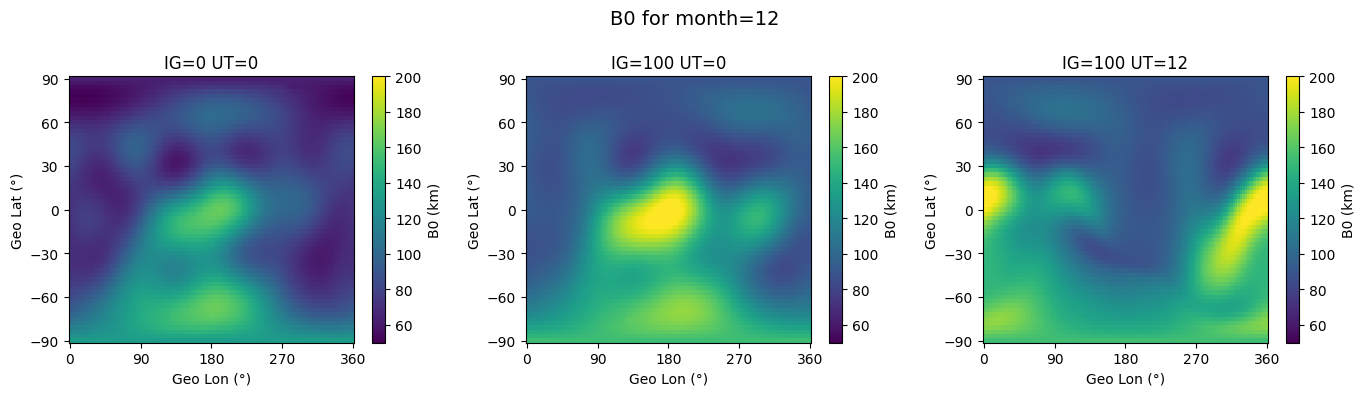

In [10]:
# Plot B0
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.subplots_adjust(right=0.85)

im0 = ax[0].pcolormesh(alon_2d, alat_2d, F2['B0'][0, :, 0].reshape(alat_2d.shape), vmin=50, vmax=200)
ax[0].set_title('IG=0 UT=0')
fig.colorbar(im0, ax=ax[0], label='B0 (km)')

im1 = ax[1].pcolormesh(alon_2d, alat_2d, F2['B0'][0, :, 1].reshape(alat_2d.shape), vmin=50, vmax=200)
ax[1].set_title('IG=100 UT=0')
fig.colorbar(im1, ax=ax[1], label='B0 (km)')

im2 = ax[2].pcolormesh(alon_2d, alat_2d, F2['B0'][12, :, 1].reshape(alat_2d.shape), vmin=50, vmax=200)
ax[2].set_title('IG=100 UT=12')
fig.colorbar(im2, ax=ax[2], label='B0 (km)')

for i in range(3):
    ax[i].set_xlabel('Geo Lon (°)')
    ax[i].set_ylabel('Geo Lat (°)')
    ax[i].set_yticks(np.arange(-90, 91, 30))
    ax[i].set_xticks(np.arange(0, 361, 90))

plt.suptitle(f'B0 for month={month:02d}', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.99, 0.99])

## Sporadic E layer

The computation of EDP parameters for the sporadic E (Es) layer requires more coefficients and is therefore done seperately.

To calculate monthly mean parameters for IG=0 and IG=100, use the `sporadic_E_monthly_mean` function. Similarly, to calculate EDP parameters for one day for a specific F10.7 input, use the `sporadic_E_1day` function.

In this tutorial, we will see how to generate monthly mean parameters.

In [6]:
Es = sh.sporadic_E_monthly_mean(year, month, aUT, alon, alat, coord=coord)

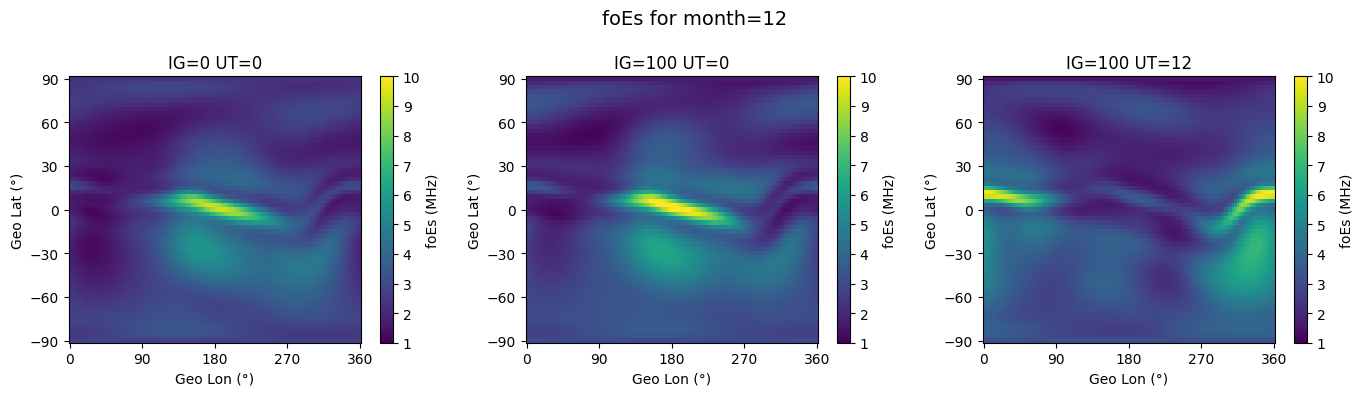

In [9]:
# Plot foEs
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.subplots_adjust(right=0.85)

im0 = ax[0].pcolormesh(alon_2d, alat_2d, Es['fo'][0, :, 0].reshape(alat_2d.shape), vmin=1, vmax=10)
ax[0].set_title('IG=0 UT=0')
fig.colorbar(im0, ax=ax[0], label='foEs (MHz)')

im1 = ax[1].pcolormesh(alon_2d, alat_2d, Es['fo'][0, :, 1].reshape(alat_2d.shape), vmin=1, vmax=10)
ax[1].set_title('IG=100 UT=0')
fig.colorbar(im1, ax=ax[1], label='foEs (MHz)')

im2 = ax[2].pcolormesh(alon_2d, alat_2d, Es['fo'][12, :, 1].reshape(alat_2d.shape), vmin=1, vmax=10)
ax[2].set_title('IG=100 UT=12')
fig.colorbar(im2, ax=ax[2], label='foEs (MHz)')

for i in range(3):
    ax[i].set_xlabel('Geo Lon (°)')
    ax[i].set_ylabel('Geo Lat (°)')
    ax[i].set_yticks(np.arange(-90, 91, 30))
    ax[i].set_xticks(np.arange(0, 361, 90))

plt.suptitle(f'foEs for month={month:02d}', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.99, 0.99])